In [13]:
import pandas as pd
import numpy as np
import Procesamiento as prep
import Red as rn
import SVM as svm
import Random_Forest as rf

Procesamiento de datos

En esta seccion se realiza un pre-procesamiento de datos, donde se elimina la variable 'client num', tambien la variable objetivo se paso a una variable numerica, la cual indica 1 si el cliente existe y 0 si el cliente no existe. Ademas, se crearon 3 variables adicionales las cuales se especifican en el informe de este proyecto. Al finalizar este pre-procesamiento se crea un nuevo archivo llamado "Datos procesados", el cual es el que se utilizara para introducir en los diferentes modelos que se compararan.

In [ ]:
# Instanciar la clase con la ruta del archivo
processor = prep.DataProcessor("bank_churn.xlsx")

# Ejecutar las funciones de la clase
processor.load_data()
processor.transform_data()
processor.one_hot_encode()
# Guardar el DataFrame procesado en un archivo Excel
processor.save_to_excel('DatosProcesados.xlsx')

En este punto se creo el archivo ya con los datos procesados y se guardo en el ambiente virtual

In [3]:
path ="DatosProcesados.xlsx"

*En la equiparacion de estos modelos se va a comparar la metrica de 'accuracy' para poder determinar cual es el mejor*

# Parte 1: Modelos con los datos desbalanceados

### **Modelo:** Red Neuronal artificial

Esta red neuronal está diseñada para clasificación binaria, con una arquitectura que incluye una capa oculta densa de 25 neuronas y activación ReLU, seguida de un Dropout del 30% para prevenir el sobreajuste, y una capa de salida con una sola neurona que utiliza activación sigmoide para generar probabilidades. El modelo se compila con la función de pérdida de entropía cruzada binaria y el optimizador Adam, mientras que la precisión es la métrica de evaluación.

C:\Users\jmaur\OneDrive\Documentos\Maestria\Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6225 - loss: 0.6853 - val_accuracy: 0.8402 - val_loss: 0.4010
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8437 - loss: 0.4057 - val_accuracy: 0.8649 - val_loss: 0.3371
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8713 - loss: 0.3457 - val_accuracy: 0.8779 - val_loss: 0.3095
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8836 - loss: 0.3049 - val_accuracy: 0.8883 - val_loss: 0.2925
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8855 - loss: 0.2958 - val_accuracy: 0.8920 - val_loss: 0.2811
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8931 - loss: 0.2803 - val_accuracy: 0.8945 - val_loss: 0.2725
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8996 - loss: 0.2734 - val_accuracy: 0.8994 - val_loss: 0.2652
Epoch 8/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8930 - loss: 0.2632 - val_accuracy: 0.

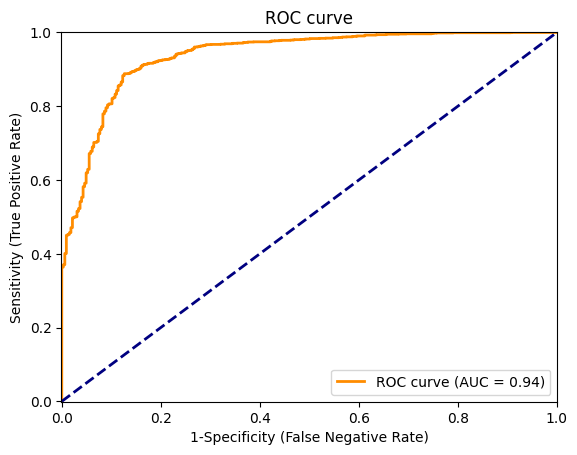

Metrics of the Neural Network:

Confusion Matrix: 
[[ 222  103]
 [  55 1646]]
Accuracy: 0.9220
Sensitivity (Recall): 0.9677
Specificity: 0.6831
Positive Predictive Value (Precision): 0.9411
Negative Predictive Value: 0.8014


In [5]:
churn_model = rn.ChurnModel(path)
churn_model.run()

El modelo de red neuronal logró un accuracy de 92.20%, indicando que acertó en la mayoría de las predicciones. Su sensibilidad (recall) fue alta, con un 96.77%, lo que significa que es muy efectivo en identificar a los clientes que realmente se fueron (churn). Sin embargo, la especificidad fue menor, 68.31%, lo que refleja que tiene algunas dificultades al identificar correctamente a los clientes que se quedan, generando más falsos positivos.

En cuanto a la precisión, el modelo tuvo un valor predictivo positivo (PPV) de 94.11%, indicando que la mayoría de las veces que predijo churn, fue correcto. El valor predictivo negativo (NPV) fue del 80.14%, lo que significa que es razonablemente confiable en identificar clientes que no se van. En resumen, el modelo es bastante efectivo para predecir churn, aunque con margen de mejora en evitar falsos positivos.

## **Modelo:** Super Vector Machine

En este modelo primero se hace un entrenamiento inicial y se obtuvieron las medidas de desempeño de ese primer modelo, sin embargo, despues se realiza un grid de los parametros para poder saber cuales son los mejores hiperparametros para el modelo, con esos hiperparametros se obtuvo la ultima matriz de confusion que esta al final y sus respectivas metricas de desempeño

Confusion matrix:
 [[ 231   94]
 [  58 1643]]
Accuracy: 0.9249753208292202
Sensitivity (Recall): 0.9659024103468548
Specificity: 0.7107692307692308
Positive Predictive Value (Precision): 0.9458837075417387
Negative Predictive Value: 0.7993079584775087


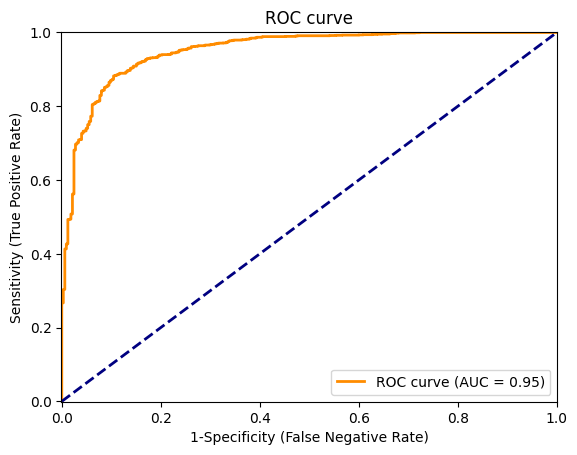

AUC: 0.9513091846425179
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END SVM__C=0.8, SVM__kernel=linear;, score=(train=0.768, test=0.775) total time=   6.7s
[CV 2/5] END SVM__C=0.8, SVM__kernel=linear;, score=(train=0.778, test=0.749) total time=   5.8s
[CV 3/5] END SVM__C=0.8, SVM__kernel=linear;, score=(train=0.771, test=0.773) total time=   5.1s
[CV 4/5] END SVM__C=0.8, SVM__kernel=linear;, score=(train=0.770, test=0.769) total time=   5.8s
[CV 5/5] END SVM__C=0.8, SVM__kernel=linear;, score=(train=0.769, test=0.753) total time=   5.8s
[CV 1/5] END SVM__C=0.8, SVM__kernel=rbf;, score=(train=0.833, test=0.773) total time=   9.5s
[CV 2/5] END SVM__C=0.8, SVM__kernel=rbf;, score=(train=0.838, test=0.765) total time=  10.3s
[CV 3/5] END SVM__C=0.8, SVM__kernel=rbf;, score=(train=0.832, test=0.792) total time=  11.3s
[CV 4/5] END SVM__C=0.8, SVM__kernel=rbf;, score=(train=0.831, test=0.775) total time=   6.9s
[CV 5/5] END SVM__C=0.8, SVM__kernel=rbf;, score=(train

In [7]:
model = svm.ChurnModel(path)
model.train()  # Entrena el modelo
model.evaluate()  # Evalúa el modelo
model.hyperparameter_tuning()  # Ajusta los hiperparámetros

El modelo SVM obtuvo un accuracy de 0.93, lo que significa que fue correcto en un 93% de las predicciones generales. La clase positiva (1), que representa a los clientes que no se retiraron, muestra un alto rendimiento con una precisión de 0.93 (el 93% de las predicciones positivas fueron correctas) y un recall de 0.98 (el modelo identificó correctamente el 98% de los clientes que no se retiraron). La F1-score para esta clase fue de 0.96, lo que indica un buen balance entre precisión y recall.

Sin embargo, la clase negativa (0) tiene un recall más bajo (0.63), lo que significa que el modelo no identifica correctamente a todos los clientes que se retiraron, aunque tiene una precisión de 0.88 en las predicciones negativas.

## **Modelo:** Random Forest

Confusion matrix:
 [[ 263   62]
 [  16 1685]]
Accuracy: 0.9615004935834156
Sensitivity (Recall): 0.9905937683715461
Specificity: 0.8092307692307692
Positive Predictive Value (Precision): 0.9645105895821409
Negative Predictive Value: 0.942652329749104


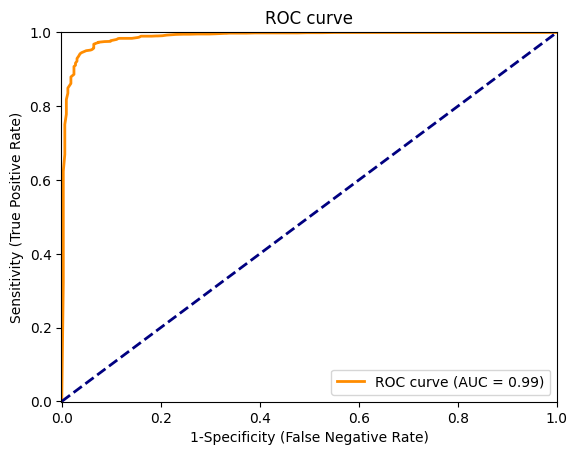

In [9]:
churn_model = rf.ChurnModel(path)

# Entrenar el modelo de Random Forest
churn_model.train_random_forest()

# Evaluar el modelo
churn_model.evaluate_model()

El modelo de Random Forest que entrenaste muestra un accuracy de 0.96, lo que indica un desempeño excelente al predecir correctamente el 96% de los casos. La sensibilidad (recall) del modelo es muy alta (0.99), lo que significa que identificó correctamente el 99% de los clientes que no se retiraron (clase 1). La precisión para esta clase es de 0.96, lo que indica que el 96% de las predicciones de clientes que no se retiraron fueron correctas.

Por otro lado, la especificidad es de 0.81, lo que significa que el modelo identificó correctamente el 81% de los clientes que se retiraron (clase 0). También cabe destacar el alto valor predictivo negativo (NPV) de 0.94, lo que sugiere que cuando predice que un cliente se retiró, lo hace con un 94% de certeza.

# Parte 2 : Prueba mejor modelo etapa previa con balanceamiento de datos

Como se ha mencionado anteriormente en este proyecto, el dataset presenta un desbalance en las clases, lo cual puede llevar a que los modelos se inclinen hacia la clase mayoritaria, en este caso, los clientes que permanecen en el banco. Dado que el objetivo es construir un modelo capaz de predecir qué clientes es probable que se retiren para poder ofrecerles beneficios personalizados, se procederá a balancear los datos para mejorar la precisión en la predicción de esta clase minoritaria.

In [8]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd

El método Random Over Sampling fue seleccionado por su simplicidad y eficiencia para abordar el desbalance en los datos sin perder información valiosa, ya que aumenta la representación de la clase minoritaria replicando aleatoriamente sus muestras. Este enfoque permite al modelo mejorar su precisión en la predicción de la clase de interés (clientes que se retiran) al reducir el sesgo hacia la clase mayoritaria. Además, a diferencia de técnicas como el Random Under Sampling, este método mantiene todas las observaciones originales, garantizando que el modelo tenga acceso a toda la información disponible y pueda aprender los patrones necesarios para cumplir el objetivo del proyecto.

In [10]:
df = pd.read_excel('DatosProcesados.xlsx') #Cargar los datos procesados 

#Se crean dos dataframes uno con la variable objetivo y otro sin la variable
X = df.drop(columns=['attrition_flag']) 
y = df['attrition_flag']

# Crear el objeto Random Over Sampler
ros = RandomOverSampler(random_state=42) #Se asigna el metodo RandomOver Sampling a la variable ros

# Aplicar el Random Over Sampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un DataFrame con los datos balanceados
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Guardar el dataset balanceado en un archivo Excel
df_resampled.to_excel('datos_balanceados.xlsx', index=False)

print("Archivo Excel con datos balanceados guardado como 'datos_balanceados.xlsx'.")

Archivo Excel con datos balanceados guardado como 'datos_balanceados.xlsx'.


In [11]:
RutaBalanceada = 'datos_balanceados.xlsx'

En este punto aplicamos el modelo de mejor rendimiento que se escogio en la **parte 1** de este proyecto (RandomForest) para poder evaluar si el rendimiento del modelo fue mejor para la prediccion de los clientes que se van.

Confusion matrix:
 [[1699    1]
 [  45 1655]]
Accuracy: 0.9864705882352941
Sensitivity (Recall): 0.9735294117647059
Specificity: 0.9994117647058823
Positive Predictive Value (Precision): 0.9993961352657005
Negative Predictive Value: 0.974197247706422


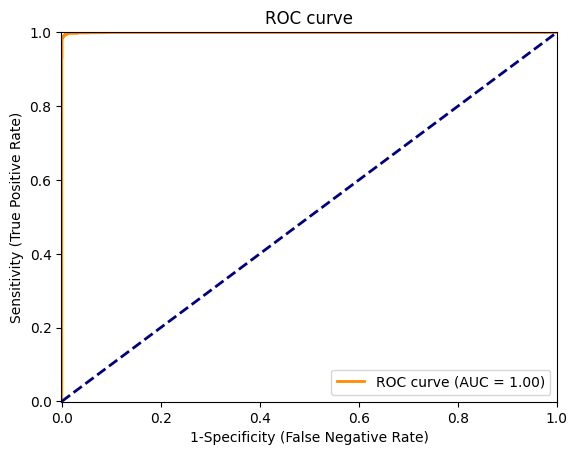

In [16]:
churn_model_2 = rf.ChurnModel(RutaBalanceada)

# Entrenar el modelo de Random Forest
churn_model_2.train_random_forest()

# Evaluar el modelo
churn_model_2.evaluate_model()

**Conclusion:** Después de aplicar el balanceo de datos, las métricas del modelo Random Forest indican una mejora notable en la capacidad del modelo para identificar ambas clases de manera equilibrada. La accuracy aumentó a 98.65%, y la especificidad alcanzó el 99.94%, lo que refleja una excelente capacidad para detectar la clase minoritaria (clientes que se retiran) sin perder precisión en la clase mayoritaria. La sensibilidad (recall) se mantiene alta en 97.35%, lo que sugiere que el modelo puede capturar la mayoría de los casos positivos de manera confiable. El Positive Predictive Value de 99.94% y el Negative Predictive Value de 97.42% muestran una notable precisión en ambas clases, validando la efectividad del balanceo en reducir el sesgo hacia la clase mayoritaria y mejorar el rendimiento del modelo para el objetivo del proyecto.